<a href="https://colab.research.google.com/github/giannicha/aiffel/blob/main/human_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importlib: 사용자가 파이썬의 import 시스템과 상호작용하기 위한 API를 제공하는 내장 라이브러리
# 사용자는 import 함수의 구현 내용과, 실행에 필요한 하위 함수들을 이용해 필요에 맞는 임포터를 직접 구현하거나 임포트 관련 기능들을 자유롭게 사용할 수 있음
# importlib.metadata: 설치된 패키지 메타 데이터에 대한 접근을 제공하는 라이브러리.
# 해당 코드 블럭에서는 importlib.metadata 안에 있는 version() 함수를 이용하여 pixellib 라이브러리의 버전을 확인

import os
import urllib  #웹에서 데이터 다운로드
import cv2  #OpenCV라이브러리로 이미지 처리
import numpy as np
from pixellib.semantic import semantic_segmentation  #pixellib:시맨틱 세그멘테이션을 편하게 사용할 수 있는 라이브러리
from matplotlib import pyplot as plt

print(cv2.__version__)


4.5.3


In [ ]:
img_path=os.getenv('HOME')+'/aiffel/human_segmentation/images/3444.png' #os 모듈에 있는 getenv()로 읽을 파일경로
img_orig=cv2.imread(img_path) #cv2.imread(경로)
print(img_orig.shape)

(540, 720, 3)


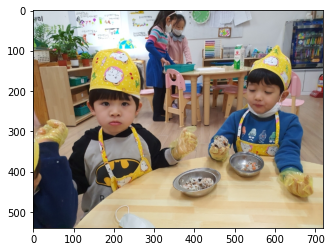

In [ ]:
# cv2.cvtColor(입력 이미지, 색상 변환 코드): 입력 이미지의 색상 채널을 변경
# cv2.COLOR_BGR2RGB: 이미지 색상 채널을 변경 (BGR 형식을 RGB 형식으로 변경)
# plt.imshow(): 저장된 데이터를 이미지의 형식으로 표시, 입력은 RGB(A) 데이터 혹은 2D 스칼라 데이터
plt.imshow(cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB)) 
plt.show()

In [ ]:
model_dir = os.getenv('HOME')+'/aiffel/human_segmentation/models' 
model_file = os.path.join(model_dir, 'deeplabv3_xception_tf_dim_ordering_tf_kernels.h5' ) #os.path.join(a, b)는 경로를 병합
model_url = 'https://github.com/ayoolaolafenwa/PixelLib/releases/download/1.1/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5' 
# 다운로드
urllib.request.urlretrieve(model_url, model_file)
#urllib.request.urlretrieve()로 model_url 다운로드하여 model_file 파일명으로 저장

('/aiffel/aiffel/human_segmentation/models/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5',
 <http.client.HTTPMessage at 0x7f2c41e96ee0>)

In [ ]:
model= semantic_segmentation() #PixelLib 라이브러리 ->클래스를 가져와서 semantic segmentation을 수행->인스턴스 만듦
model.load_pascalvoc_model(model_file) # pascal voc에 대해 훈련된 예외 모델(model_file)을 로드


Instructions for updating:
Colocations handled automatically by placer.


In [ ]:
segvalues, output = model.segmentAsPascalvoc(img_path) 
# segvalues, output = segment_image.segmentAsPascalvoc()=> 분할 출력함수 를 호출 하여 입력된 이미지를 분할, 분할 출력의 배열을 가져옴, 
#분할은 pacalvoc 데이터로 학습된 모델을 이용

/opt/conda/lib/python3.9/site-packages/tensorflow/python/keras/engine/training.py:2464: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


In [ ]:
#pascalvoc 데이터의 라벨종류
LABEL_NAMES = [
    'background', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus',
    'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike',
    'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tv'
]
len(LABEL_NAMES)

21

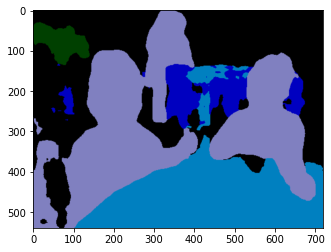

In [ ]:
#segmentAsPascalvoc() 함수 를 호출하여 입력된 이미지를 분할한 뒤 나온 결과값 중 output을 matplotlib을 이용해 출력
plt.imshow(output)
plt.show()

In [ ]:
# segmentAsPascalvoc() 함수를 호출하여 입력된 이미지를 분할한 뒤 나온 결과값 중 배열값을 출력
segvalues


{'class_ids': array([ 0,  9, 11, 15, 16]),
 'masks': array([[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]])}

In [ ]:
#label확인
for class_id in segvalues['class_ids']:
    print(LABEL_NAMES[class_id])

background
chair
diningtable
person
pottedplant


In [ ]:
colormap = np.zeros((256, 3), dtype = int)
ind = np.arange(256, dtype=int)

for shift in reversed(range(8)):
    for channel in range(3):
        colormap[:, channel] |= ((ind >> channel) & 1) << shift
    ind >>= 3

colormap[:20]

array([[  0,   0,   0],
       [128,   0,   0],
       [  0, 128,   0],
       [128, 128,   0],
       [  0,   0, 128],
       [128,   0, 128],
       [  0, 128, 128],
       [128, 128, 128],
       [ 64,   0,   0],
       [192,   0,   0],
       [ 64, 128,   0],
       [192, 128,   0],
       [ 64,   0, 128],
       [192,   0, 128],
       [ 64, 128, 128],
       [192, 128, 128],
       [  0,  64,   0],
       [128,  64,   0],
       [  0, 192,   0],
       [128, 192,   0]])

In [ ]:
colormap[15]

array([192, 128, 128])

In [ ]:
seg_color = (128,128,192)


(540, 720)


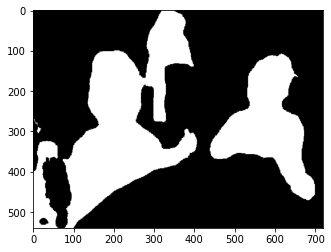

In [ ]:
# output의 픽셀 별로 색상이 seg_color와 같다면 1(True), 다르다면 0(False)이 됩니다
seg_map = np.all(output==seg_color, axis=-1)
print(seg_map.shape)
plt.imshow(seg_map, cmap='gray')
plt.show()

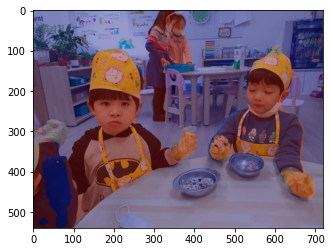

In [ ]:
# 원본이미지를 img_show에 할당한뒤 이미지 사람이 있는 위치와 배경을 분리해서 표현한 color_mask 를 만든뒤 두 이미지를 합쳐서 출력
img_show = img_orig.copy()

# True과 False인 값을 각각 255과 0으로 바꿔줍니다
img_mask = seg_map.astype(np.uint8) * 255

# 255와 0을 적당한 색상으로 바꿔봅니다
color_mask = cv2.applyColorMap(img_mask, cv2.COLORMAP_JET)

# 원본 이미지와 마스크를 적당히 합쳐봅니다
# 0.6과 0.4는 두 이미지를 섞는 비율입니다.
img_show = cv2.addWeighted(img_show, 0.6, color_mask, 0.4, 0.0)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

- 배경블러하기

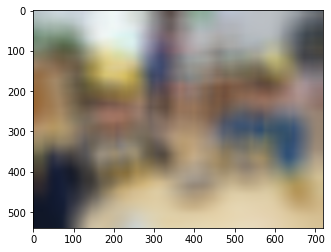

In [ ]:
img_orig_blur = cv2.blur(img_orig, (70,70))  
plt.imshow(cv2.cvtColor(img_orig_blur, cv2.COLOR_BGR2RGB))
plt.show()

- 세그멘테이션 마스크를 이용해 배경만 추출


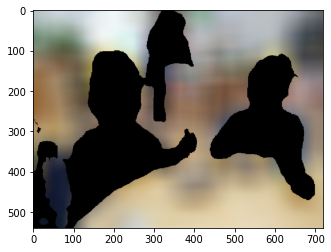

In [ ]:
img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)
img_bg_mask = cv2.bitwise_not(img_mask_color)
img_bg_blur = cv2.bitwise_and(img_orig_blur, img_bg_mask)
plt.imshow(cv2.cvtColor(img_bg_blur, cv2.COLOR_BGR2RGB))
plt.show()

- 흐린 배경과 원본 영상 합성

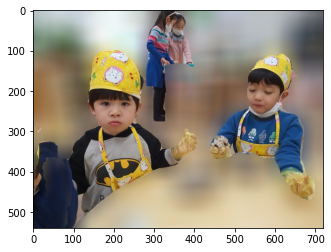

In [ ]:
img_concat = np.where(img_mask_color==255, img_orig, img_bg_blur)
plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
plt.show()

# 수정하고자 하는 부분:
- 왼쪽하단 팔 블러처리, 라운드 테이블 다시 블러오기, 뒤에 사람 블러처리
- 객체를 각각 수정할수 있는 기능이 필요


In [ ]:
import pixellib
from pixellib.instance import instance_segmentation



test size :  (540, 720, 3)


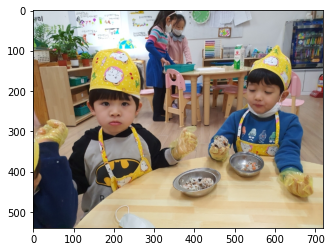

In [ ]:
import os
import urllib
import cv2
import numpy as np

from matplotlib import pyplot as plt
img_path_test = os.getenv('HOME')+'/aiffel/3444.png'
test_img = cv2.imread(img_path_test)
print('test size : ', test_img.shape)
plt.imshow(cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
# 1
model_dir = os.getenv('HOME')+'/aiffel/human_segmentation/models' 
# 2
instance_model_file = os.path.join(model_dir, 'mask_rcnn_coco.h5') 

instance_model_url = 'https://github.com/ayoolaolafenwa/PixelLib/releases/download/1.2/mask_rcnn_coco.h5'

urllib.request.urlretrieve(instance_model_url, instance_model_file) # urllib 패키지 내에 있는 request 모듈의 urlretrieve 함수를 이용해서 model_url에 있는 파일을 다운로드 해서 model_file 파일명으로 저장

('/aiffel/aiffel/human_segmentation/models/mask_rcnn_coco.h5',
 <http.client.HTTPMessage at 0x7f2c08113670>)

In [ ]:
model_instance = instance_segmentation() # 속도 조정은 여기서
model_instance.load_model(instance_model_file)

In [ ]:
segmask, output = model_instance.segmentImage(img_path_test)

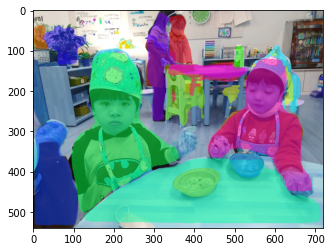

In [ ]:
# cv2.imwrite('3444_test.png', output)
plt.imshow(output)
plt.show()

In [ ]:
segmask_box, output_box = model_instance.segmentImage(img_path_test, show_bboxes = True)

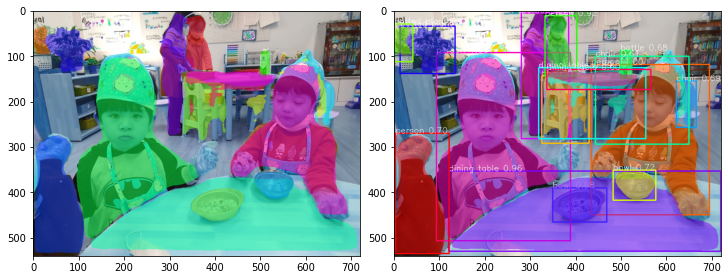

In [ ]:
fig = plt.figure(figsize = (10, 7), constrained_layout=True)
ax = fig.add_subplot(1,2,1)
imgplot = plt.imshow(output)
ax = fig.add_subplot(1,2,2)
imgplot = plt.imshow(output_box)

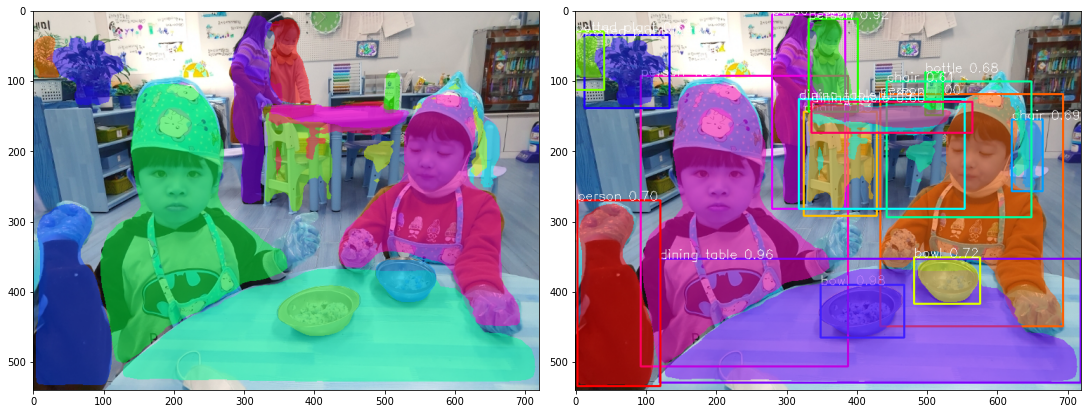

In [ ]:
fig = plt.figure(figsize = (15, 12), constrained_layout=True)
ax = fig.add_subplot(1,2,1)
imgplot = plt.imshow(output)
ax = fig.add_subplot(1,2,2)
imgplot = plt.imshow(output_box)

In [ ]:
target_classes = model_instance.select_target_classes(person=True) # 사람만 박싱하기
segmask_person, output_person = model_instance.segmentImage(img_path, segment_target_classes = target_classes, show_bboxes = True)

In [ ]:
- instance segmentation모델을 적용하여 사람을 각각 분리해 보고 따로 저장할 의도였다

SyntaxError: invalid syntax (663951892.py, line 1)

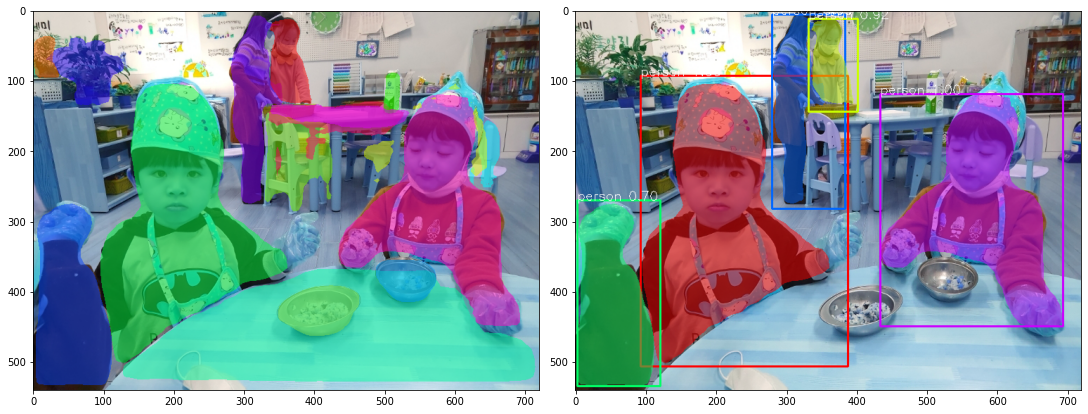

In [ ]:
fig = plt.figure(figsize = (15, 12), constrained_layout=True)
ax = fig.add_subplot(1,2,1)
imgplot = plt.imshow(output)
ax = fig.add_subplot(1,2,2)
imgplot = plt.imshow(output_person) 